In [3]:
import os.path as osp

import torch
import torch.nn.functional as F
from sklearn.metrics import f1_score

from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATConv, SAGEConv, NNConv, GCNConv
import matplotlib.pyplot as plt

In [7]:
%run dataset_nc.ipynb

Processing...


DATASET LOADED
EnterpriseModelDatasetNC(110)


Done!


In [126]:
torch.manual_seed(42)
dataset = dataset_nc.shuffle()

train_dataset = dataset[:int(len(dataset) * 1)]

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')
print(dataset[0])

Number of graphs total: 110
Number of training graphs: 110
Number of test graphs: 0
Data(x=[26, 1], edge_index=[2, 25], edge_attr=[25, 1], y=[26], train_mask=[26], test_mask=[26])


In [127]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset, Data

NUM_GRAPHS_PER_BATCH = len(dataset)
NUM_HIDDEN_CHANNELS = 64

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [128]:
x = []
edge_index = []
edge_attr = []
y = []
train_mask = []
test_mask = []
for batch in train_loader:
    x = batch.x
    edge_index = batch.edge_index
    edge_attr = batch.edge_attr
    y = batch.y
    train_mask = batch.train_mask
    test_mask = batch.test_mask

data = Data(x=x, 
            edge_index=edge_index,
            edge_attr=edge_attr,
            y=y,
            train_mask=train_mask,
            test_mask=test_mask
            ) 

num_nodes = data.x.shape[0]
print(data)

Data(x=[3020, 1], edge_index=[2, 3216], edge_attr=[3216, 1], y=[3020], train_mask=[3020], test_mask=[3020])


In [118]:
new_y = []
for onehot in data.y:
    new_y.append((onehot==1).nonzero().item())
    
data.y = torch.tensor(new_y, dtype=torch.int64)

In [129]:
data.y

tensor([35, 35, 35,  ..., 19, 10, 10])

In [110]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [111]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

RuntimeError: expected scalar type Long but found Float

In [58]:
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')


Accuracy: 0.2356


In [14]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')

In [15]:
cora = dataset[0]
cora

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [16]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
cora = cora.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(cora)
    loss = F.nll_loss(out[cora.train_mask], cora.y[cora.train_mask])
    loss.backward()
    optimizer.step()

In [18]:
model.eval()
pred = model(cora).argmax(dim=1)
correct = (pred[cora.test_mask] == cora.y[cora.test_mask]).sum()
acc = int(correct) / int(cora.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7850


In [1]:
torch.manual_seed(42)
dataset = dataset_nc.shuffle()

train_dataset = dataset[:int(len(dataset) * 1)]

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(dataset[0])

NameError: name 'torch' is not defined

In [141]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset, Data

NUM_GRAPHS_PER_BATCH = 8
NUM_HIDDEN_CHANNELS = 64

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [132]:
train_loader.dataset

EnterpriseModelDatasetNC(110)

In [142]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [143]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [144]:
def train():
    model.train()

    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        total_loss += loss.item() * data.num_graphs
        loss.backward()
        optimizer.step()
    return total_loss / len(train_loader.dataset)

In [145]:
@torch.no_grad()
def test():
    model.eval()

    total_acc = 0
    for data in train_loader:
        pred = model(data).argmax(dim=1)
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        acc = int(correct) / int(data.test_mask.sum())
        total_acc += acc * data.num_graphs
    return total_acc / len(train_loader.dataset)

Epoch: 001, Loss: 7.4855, Acc: 0.1489,
Epoch: 002, Loss: 3.8820, Acc: 0.1584,
Epoch: 003, Loss: 3.2635, Acc: 0.1449,
Epoch: 004, Loss: 3.0469, Acc: 0.1509,
Epoch: 005, Loss: 2.9848, Acc: 0.1580,
Epoch: 006, Loss: 2.9413, Acc: 0.1723,
Epoch: 007, Loss: 2.9319, Acc: 0.1694,
Epoch: 008, Loss: 2.9021, Acc: 0.2129,
Epoch: 009, Loss: 2.8747, Acc: 0.1885,
Epoch: 010, Loss: 2.8575, Acc: 0.1988,


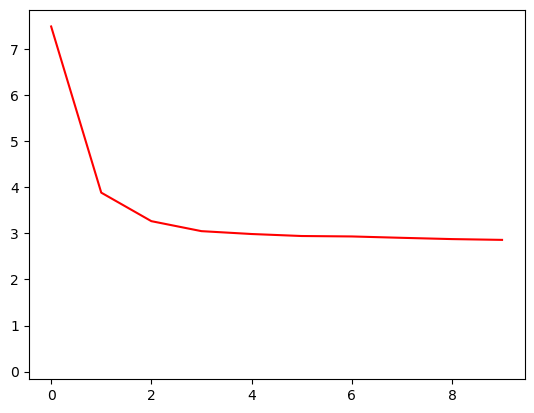

In [146]:
loss_values = []
acc_values = []

for epoch in range(1, 11):
    loss = train()
    acc = test()
    
    loss_values.append(loss)
    acc_values.append(acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, 'f'Acc: {acc:.4f},')
    

plt.plot(loss_values, 'r', acc, 'b',)
plt.show()


In [39]:
torch.manual_seed(42)
dataset = dataset_nc.shuffle()

train_dataset = dataset[:int(len(dataset) * 1)]

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(dataset[0])

Number of graphs total: 110
Number of training graphs: 110
Data(x=[26, 1], edge_index=[2, 25], edge_attr=[25, 1], y=[26], train_mask=[26], test_mask=[26])


In [40]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset, Data

NUM_GRAPHS_PER_BATCH = 8
NUM_HIDDEN_CHANNELS = 64

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [41]:
class GATGNN2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GATConv(dataset.num_node_features, NUM_HIDDEN_CHANNELS, heads=4, edge_dim=1)
        self.lin1 = torch.nn.Linear(dataset.num_node_features, 4 * NUM_HIDDEN_CHANNELS)
        
        self.conv2 = GATConv(4 * NUM_HIDDEN_CHANNELS, NUM_HIDDEN_CHANNELS, heads=4, edge_dim=1)
        self.lin2 = torch.nn.Linear(4 * NUM_HIDDEN_CHANNELS, 4 * NUM_HIDDEN_CHANNELS)
        
        self.conv3 = GATConv(4 * NUM_HIDDEN_CHANNELS, dataset.num_classes, heads=6, concat=False, edge_dim=1)
        self.lin3 = torch.nn.Linear(4 * NUM_HIDDEN_CHANNELS, dataset.num_classes)

        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = F.elu(self.conv1(x, edge_index, edge_attr) + self.lin1(x))
        x = F.elu(self.conv2(x, edge_index, edge_attr) + self.lin2(x))
        x = self.conv3(x, edge_index, edge_attr) + self.lin3(x)
        return F.log_softmax(x, dim=1)
        #return x

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GATGNN2().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GATGNN2(
  (conv1): GATConv(1, 64, heads=4)
  (lin1): Linear(in_features=1, out_features=256, bias=True)
  (conv2): GATConv(256, 64, heads=4)
  (lin2): Linear(in_features=256, out_features=256, bias=True)
  (conv3): GATConv(256, 36, heads=6)
  (lin3): Linear(in_features=256, out_features=36, bias=True)
)
Number of parameters:  200104


In [43]:
def train():
    model.train()

    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        print(out.shape)
        print(data.y.shape)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        total_loss += loss.item() * data.num_graphs
        loss.backward()
        optimizer.step()
    return total_loss / len(train_loader.dataset)

In [44]:
@torch.no_grad()
def test():
    model.eval()

    total_acc = 0
    for data in train_loader:
        pred = model(data).argmax(dim=1)
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        acc = int(correct) / int(data.test_mask.sum())
        total_acc += acc * data.num_graphs
    return total_acc / len(train_loader.dataset)

torch.Size([248, 36])
torch.Size([248])
torch.Size([199, 36])
torch.Size([199])
torch.Size([165, 36])
torch.Size([165])
torch.Size([139, 36])
torch.Size([139])
torch.Size([239, 36])
torch.Size([239])
torch.Size([236, 36])
torch.Size([236])
torch.Size([244, 36])
torch.Size([244])
torch.Size([170, 36])
torch.Size([170])
torch.Size([289, 36])
torch.Size([289])
torch.Size([221, 36])
torch.Size([221])
torch.Size([237, 36])
torch.Size([237])
torch.Size([274, 36])
torch.Size([274])
torch.Size([209, 36])
torch.Size([209])
torch.Size([150, 36])
torch.Size([150])
Epoch: 001, Loss: 23.6032, Acc: 0.1836,


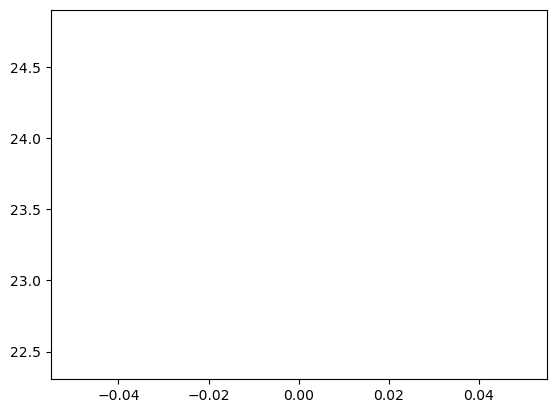

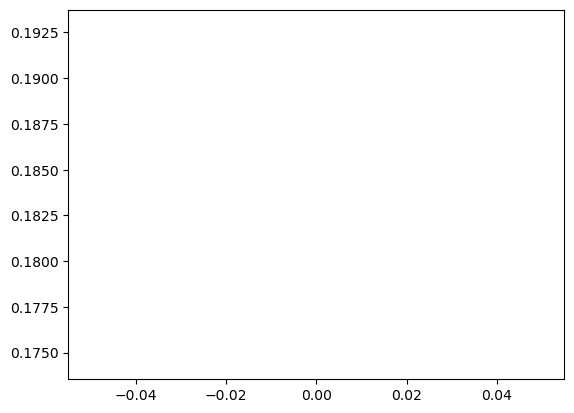

In [45]:
loss_values = []
acc_values = []

for epoch in range(1, 2):
    loss = train()
    acc = test()
    
    loss_values.append(loss)
    acc_values.append(acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, 'f'Acc: {acc:.4f},')
    

plt.plot(loss_values, 'r',)
plt.show()
plt.plot(acc_values, 'b',)
plt.show()

In [1]:
from torch_geometric.datasets import Planetoid
from sklearn.manifold import TSNE
from torch_geometric.nn import Node2Vec

dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

Epoch: 01, Loss: 5.5223, Acc: 0.1530
Epoch: 02, Loss: 4.0255, Acc: 0.1710
Epoch: 03, Loss: 3.1549, Acc: 0.1970
Epoch: 04, Loss: 2.5873, Acc: 0.2370
Epoch: 05, Loss: 2.1784, Acc: 0.2770
Epoch: 06, Loss: 1.8708, Acc: 0.3190
Epoch: 07, Loss: 1.6427, Acc: 0.3680
Epoch: 08, Loss: 1.4657, Acc: 0.4100
Epoch: 09, Loss: 1.3302, Acc: 0.4500
Epoch: 10, Loss: 1.2315, Acc: 0.4790
Epoch: 11, Loss: 1.1533, Acc: 0.5140
Epoch: 12, Loss: 1.0951, Acc: 0.5400
Epoch: 13, Loss: 1.0480, Acc: 0.5670
Epoch: 14, Loss: 1.0140, Acc: 0.6020
Epoch: 15, Loss: 0.9852, Acc: 0.6180
Epoch: 16, Loss: 0.9654, Acc: 0.6370
Epoch: 17, Loss: 0.9446, Acc: 0.6510
Epoch: 18, Loss: 0.9311, Acc: 0.6510
Epoch: 19, Loss: 0.9184, Acc: 0.6690
Epoch: 20, Loss: 0.9096, Acc: 0.6780
Epoch: 21, Loss: 0.8993, Acc: 0.6790
Epoch: 22, Loss: 0.8931, Acc: 0.6760
Epoch: 23, Loss: 0.8860, Acc: 0.6750
Epoch: 24, Loss: 0.8815, Acc: 0.6860
Epoch: 25, Loss: 0.8768, Acc: 0.6900
Epoch: 26, Loss: 0.8723, Acc: 0.6900
Epoch: 27, Loss: 0.8682, Acc: 0.7000
E

C:\Users\alber\anaconda3\envs\pyg_env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\alber\anaconda3\envs\pyg_env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


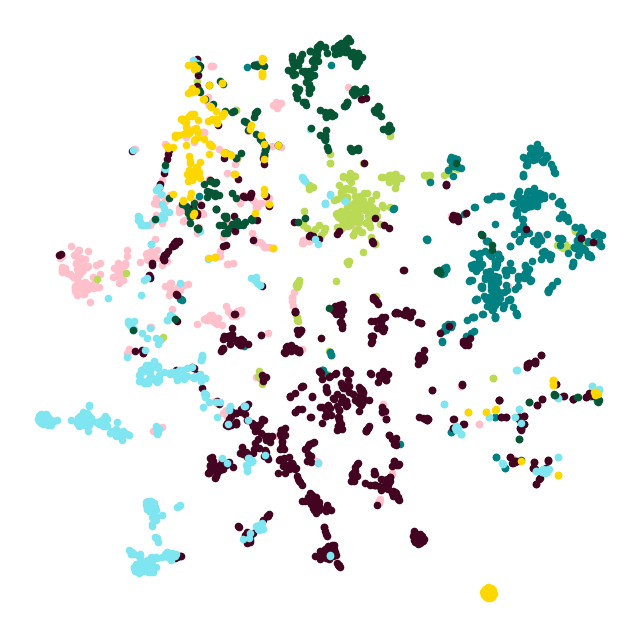

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=64, walk_length=20,
                 context_size=10, walks_per_node=10,
                 num_negative_samples=1, p=1, q=1, sparse=True).to(device)

num_workers = 0
loader = model.loader(batch_size=128, shuffle=True, num_workers=num_workers)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

for epoch in range(1, 201):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
    '#ffd700'
]
plot_points(colors)

In [21]:
torch.manual_seed(42)
dataset = dataset_nc.shuffle()

train_dataset = dataset[:int(len(dataset) * 1)]

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(dataset[0])

Number of graphs total: 110
Number of training graphs: 110
Data(x=[26, 1], edge_index=[2, 25], edge_attr=[25, 1], y=[26], train_mask=[26], test_mask=[26])


In [22]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset, Data

NUM_GRAPHS_PER_BATCH = len(dataset)
NUM_HIDDEN_CHANNELS = 64

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [23]:
x = []
edge_index = []
edge_attr = []
y = []
train_mask = []
test_mask = []
for batch in train_loader:
    x = batch.x
    edge_index = batch.edge_index
    edge_attr = batch.edge_attr
    y = batch.y
    train_mask = batch.train_mask
    test_mask = batch.test_mask

data = Data(x=x, 
            edge_index=edge_index,
            edge_attr=edge_attr,
            y=y,
            train_mask=train_mask,
            test_mask=test_mask
            ) 

num_nodes = data.x.shape[0]
print(data)

Data(x=[3020, 1], edge_index=[2, 3216], edge_attr=[3216, 1], y=[3020], train_mask=[3020], test_mask=[3020])


Epoch: 01, Loss: 2.0405, Acc: 0.1542
Epoch: 02, Loss: 1.5963, Acc: 0.1556
Epoch: 03, Loss: 1.3148, Acc: 0.1485
Epoch: 04, Loss: 1.1368, Acc: 0.1471
Epoch: 05, Loss: 1.0262, Acc: 0.1513
Epoch: 06, Loss: 0.9538, Acc: 0.1570
Epoch: 07, Loss: 0.9040, Acc: 0.1598
Epoch: 08, Loss: 0.8721, Acc: 0.1485
Epoch: 09, Loss: 0.8474, Acc: 0.1485
Epoch: 10, Loss: 0.8298, Acc: 0.1513
Epoch: 11, Loss: 0.8158, Acc: 0.1542
Epoch: 12, Loss: 0.8047, Acc: 0.1584
Epoch: 13, Loss: 0.7967, Acc: 0.1542
Epoch: 14, Loss: 0.7897, Acc: 0.1542
Epoch: 15, Loss: 0.7841, Acc: 0.1570
Epoch: 16, Loss: 0.7796, Acc: 0.1556
Epoch: 17, Loss: 0.7755, Acc: 0.1584
Epoch: 18, Loss: 0.7720, Acc: 0.1598
Epoch: 19, Loss: 0.7691, Acc: 0.1584
Epoch: 20, Loss: 0.7667, Acc: 0.1584
Epoch: 21, Loss: 0.7652, Acc: 0.1556
Epoch: 22, Loss: 0.7627, Acc: 0.1641
Epoch: 23, Loss: 0.7610, Acc: 0.1641
Epoch: 24, Loss: 0.7599, Acc: 0.1655
Epoch: 25, Loss: 0.7589, Acc: 0.1598
Epoch: 26, Loss: 0.7575, Acc: 0.1598
Epoch: 27, Loss: 0.7565, Acc: 0.1570
E

C:\Users\alber\anaconda3\envs\pyg_env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\alber\anaconda3\envs\pyg_env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


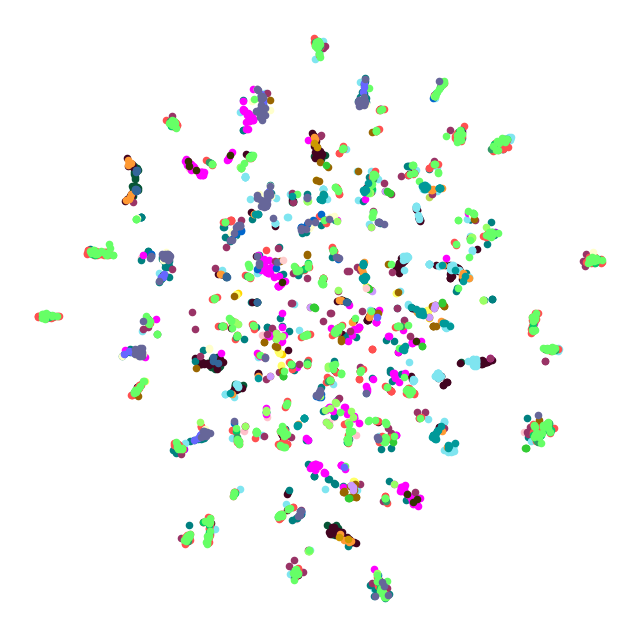

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=16, walk_length=20,
                 context_size=10, walks_per_node=10,
                 num_negative_samples=1, p=1, q=1, sparse=True).to(device)

num_workers = 0
loader = model.loader(batch_size=128, shuffle=True,
                      num_workers=num_workers)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

for epoch in range(1, 101):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
    '#ffd700', '#9900ff', '#008080', '#420420', '#7fe5f0', '#065535',
    '#008080', '#420420', '#7fe5f0', '#ff00ff', '#993366', '#ff5050',
    '#ff9933', '#ffff66', '#ffffcc', '#0066cc', '#00cc66', '#333300',
    '#996600', '#99ff66', '#cc99ff', '#336699', '#33cc33', '#339966',
    '#cc9900', '#66ff66', '#6666ff', '#009999', '#666699', '#ffcccc',
]
plot_points(colors)